In [1]:
# Requirements
# Cython==0.28.2
# numpy==1.14.2
# scipy==1.0.1
# pandas==0.23.0
# scikit-learn==0.19.1
# matplotlib==2.2.2
# plotly==2.5.1
# scikit-image==0.14.0
# imageio==2.3.0

In [2]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import pandas as pd
init_notebook_mode(connected=True)

In [3]:
# What Plotly Surface was supposed to be used for
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

data = [go.Surface(z=z_data.values)]
layout = go.Layout(
    title='Mt Bruno Elevation',
    autosize=False,
    width=500,
    height=500,
    margin=dict(l=65, r=50, b=65, t=90)
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='elevations-3d-surface')

uint8 (1024, 1024, 4)


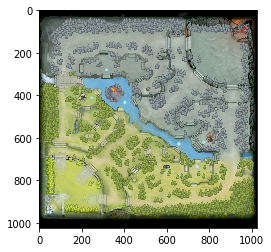

In [4]:
# Load image
%matplotlib inline
from imageio import imread
from matplotlib.pyplot import imshow

# img = imread('dota2-map-full.jpg')
# img = imread('dota2-map-mid.jpg')
img = imread('dota2-map-sketch.png')

# Result
imshow(img)
print(img.dtype, img.shape)

uint8 (199, 199, 4)


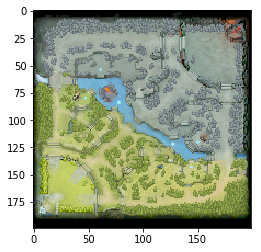

In [5]:
# Resize the image
import numpy as np
from skimage.transform import resize
max_pixels = 40000
cur_pixels = img.shape[0] * img.shape[1]

if cur_pixels > max_pixels:
    downsampling_factor = np.sqrt(cur_pixels / max_pixels)
    new_size = (img.shape[0] // downsampling_factor,
                img.shape[1] // downsampling_factor)
    img = np.uint8(255 * resize(img, new_size, mode='reflect', anti_aliasing=False))

# Result
imshow(img)
print(img.dtype, img.shape)

In [6]:
# We want a list of RGB values
img_array = img[:, :, :3].reshape((img.shape[0] * img.shape[1], 3))

# Show image properties
print(img.shape[0], '*', img.shape[1], '=', img_array.shape[0])
print(img_array.dtype, img_array.shape)

199 * 199 = 39601
uint8 (39601, 3)


[[137 155  70]
 [ 38  45  24]
 [165 176 164]
 [107 119 116]
 [187 194 110]
 [  1   4   0]
 [128 140 136]
 [111 126  57]
 [115 173 203]
 [ 66  76  57]
 [200 198 139]
 [ 89 101  94]
 [148 161 152]
 [158 170  98]
 [188 200 183]]


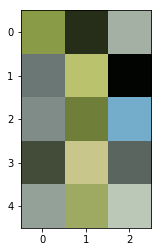

In [7]:
# Find most "representative" colors
n_colors = 15
from sklearn.cluster import KMeans
clt = KMeans(n_clusters=n_colors, max_iter=50)
clt.fit(img_array)

# Show colors
colors = (clt.cluster_centers_ + 0.5).astype(int)
colors_matrix = np.reshape(colors, [5, colors.shape[0] // 5, 3])
imshow(colors_matrix)
print(colors)

In [8]:
# Replace pixel values with nearest representative
from matplotlib.colors import ListedColormap

replaced_pixels = colors[clt.labels_ ]
img_ = replaced_pixels.reshape([img.shape[0], img.shape[1], -1])

# Result
imshow(img_)
print(img_.dtype, img_.shape)

int64 (199, 199, 3)


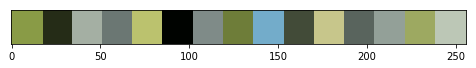

In [9]:
# Create a Matplotlib colormap with the colors representatives
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

my_cmap_mpl = ListedColormap(clt.cluster_centers_.astype(float) / 255)

# Result
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
fig, ax = plt.subplots(figsize=(8,.5), nrows=1)
fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
ax.imshow(gradient, aspect='auto', cmap=my_cmap_mpl)
ax.set_yticks([])
plt.show()

In [10]:
# Convert the colormap to plotly format
tot_points = 255
h = 1.0 / (tot_points - 1)
my_cmap_ply = []
for k in range(tot_points):
    C =[np.uint8(x) for x in np.array(my_cmap_mpl(k * h)[:3]) * 255]
    my_cmap_ply.append([round(k * h, 3), 'rgb({}, {}, {})'.format(C[0], C[1], C[2])])

print('\n'.join([str(c) for c in my_cmap_ply]))

[0.0, 'rgb(137, 155, 70)']
[0.004, 'rgb(137, 155, 70)']
[0.008, 'rgb(137, 155, 70)']
[0.012, 'rgb(137, 155, 70)']
[0.016, 'rgb(137, 155, 70)']
[0.02, 'rgb(137, 155, 70)']
[0.024, 'rgb(137, 155, 70)']
[0.028, 'rgb(137, 155, 70)']
[0.031, 'rgb(137, 155, 70)']
[0.035, 'rgb(137, 155, 70)']
[0.039, 'rgb(137, 155, 70)']
[0.043, 'rgb(137, 155, 70)']
[0.047, 'rgb(137, 155, 70)']
[0.051, 'rgb(137, 155, 70)']
[0.055, 'rgb(137, 155, 70)']
[0.059, 'rgb(137, 155, 70)']
[0.063, 'rgb(137, 155, 70)']
[0.067, 'rgb(37, 44, 23)']
[0.071, 'rgb(37, 44, 23)']
[0.075, 'rgb(37, 44, 23)']
[0.079, 'rgb(37, 44, 23)']
[0.083, 'rgb(37, 44, 23)']
[0.087, 'rgb(37, 44, 23)']
[0.091, 'rgb(37, 44, 23)']
[0.094, 'rgb(37, 44, 23)']
[0.098, 'rgb(37, 44, 23)']
[0.102, 'rgb(37, 44, 23)']
[0.106, 'rgb(37, 44, 23)']
[0.11, 'rgb(37, 44, 23)']
[0.114, 'rgb(37, 44, 23)']
[0.118, 'rgb(37, 44, 23)']
[0.122, 'rgb(37, 44, 23)']
[0.126, 'rgb(37, 44, 23)']
[0.13, 'rgb(37, 44, 23)']
[0.134, 'rgb(164, 175, 163)']
[0.138, 'rgb(164, 175, 

In [11]:
# Create 3D surface

img_ = (clt.labels_ / len(clt.cluster_centers_)).reshape(img.shape[:2])
img_ = np.fliplr(img_)

yy = np.linspace(0, 1, img.shape[0])
xx = np.linspace(0, 1, img.shape[1])
zz = np.zeros(img.shape[:2])

surf = go.Surface(
    x=xx, y=yy, z=zz,
    colorscale=my_cmap_ply,
    surfacecolor=img_,
    showscale=False
)
fig = go.Figure(data=go.Data([surf]), layout=go.Layout())

iplot(fig, filename='dota2-map-terrain')

In [18]:
# Load the data of a game
import re

# df = pd.read_csv('2842186236.csv')
df = pd.read_csv('2842231681.csv')
# df = pd.read_csv('2842231742.csv')
# df = pd.read_csv('2842269046.csv')
# Only keep X, Y and Deaths columns
cols = [col for col in df.columns if col.startswith('X_') or col.startswith('Y_') or col.startswith('Deaths_')] + ['tick']
df = df[cols]

# Forward-fill missing values
df.ffill(inplace=True)

# Infer players data from column names
players = []
pattern = re.compile(r'[^_]+_([0-9])_(R|D)_([a-z_]+)_(W|L)')
for col in df.columns:
    if not col.startswith('X_'):
        continue
    
    match = re.match(pattern, col)
    if match:
        player_id, team, hero, outcome = match.group(1), match.group(2), match.group(3), match.group(4)
        players.append((player_id, team, hero, outcome))

# For every hero
traces = []
styles = {}
for player_id, team, hero, outcome in players:
    col_part = '_{player_id}_{team}_{hero}_{outcome}'.format(
        player_id=player_id, team=team, hero=hero, outcome=outcome)
    color = '#0088FF' if team == 'D' else '#FF530D'
    styles[hero] = {
        'mode': 'lines',
        'line': go.Line(color=color),
        'legendgroup': hero.replace('_', ' ').title(),
        'name': '{hero} ({team})'.format(hero=hero.replace('_', ' ').title(), team=team)
    }
    
    # Group the sequences of locations by associated number of deaths and plot each sequence
    # This is to avoid "teleportations" to the base
    for _, sub_df in df.groupby('Deaths' + col_part):
        xx = sub_df['X'+col_part].values
        yy = sub_df['Y'+col_part].values
        zz = sub_df['tick'].values
        style = styles[hero]
        trace = go.Scatter3d(
            x=xx, y=yy, z=zz,
            showlegend=False,
            **style
        )
        traces.append(trace)

        
for legend_group, style in styles.items():
    trace = go.Scatter3d(
        x=[np.nan], y=[np.nan], z=[np.nan],
        **style
    )
    traces.append(trace)

In [22]:
yy = np.linspace(-8000, +8000, img.shape[0])
xx = np.linspace(-8000, +8000, img.shape[1])
zz = np.full(img.shape[:2], -90)

surf = go.Surface(
    x=xx, y=yy, z=zz,
    colorscale=my_cmap_ply,
    surfacecolor=img_,
    showscale=False
)


layout = go.Layout(
    margin=dict(l=0,r=0,b=0,t=0),
    scene=go.Scene(
        xaxis=go.XAxis(title='', showticklabels=False),
        yaxis=go.YAxis(title='', showticklabels=False),
        zaxis=go.ZAxis(title='Time (s)'),
        aspectratio=dict(x=1, y=1, z=1.8)
    )
)
fig = go.Figure(data=go.Data([surf] + traces), layout=layout)

iplot(fig, filename='dota2-map-terrain')

In [14]:
from plotly.offline import plot
plot(fig, filename='dota.html', auto_open=False)

'file:///Users/marcotamassia/dota.html'